___
<center><a href='https://upload.wikimedia.org/wikipedia/en/6/6a/KUSTAR_Logo.jpg'><img src='https://upload.wikimedia.org/wikipedia/en/6/6a/KUSTAR_Logo.jpg' style='width:40%;'/></a></center>


<center><em> Department of Electrical Engineering and Computer Science</em></center>
<center><em> Intro to Machine Learning (COSC 434)</em></center>
<center><em>FALL 2023</em></center>
<center><em>Project: Predictive Machine Learning Model for Early Detection of Diabetes Using Health Indicators Dataset</em></center>
<center><em>Course Instructor: Dr. Panos Liatsis</em></center>
<center><em>Lab Instructor: Basit Alawode</em></center>
<center><em><b>Students Names:</b></em></center>
<center><em>Ahmed Sajwani 10005817</em></center>
<center><em>Humaid Alhammadi 100059158</em></center>

___


## 1-Importing Libraries

In [56]:
# Import packages to visualize and evaluate the models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

## 2-Data Preprocessing

### 2.1-Loading the Data

In [57]:
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

### 2.2-Understanding the Data

In [58]:
# Getting the first 5 elements
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [59]:
# Getting the last 5 elements
data.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [60]:
# Dimension of our dataframe
data.shape

(70692, 22)

In [61]:
# More understanding of the data
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [62]:
# Checking for any categorical or null data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [63]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [64]:
# Checking for any duplicated data
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
# We will remove the duplicates in 2.3. Because 2.2 is just for understanding the data.

Number of duplicate rows: 1635


In [65]:
# Checking the distribution of the classes:
value_counts = data['Diabetes_binary'].value_counts()
print(value_counts)

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


In [66]:
# Checking if any None values exist
has_any_none = data.isna().any().any()
print(has_any_none)

False


### 2.3-Removing Duplicates

In [67]:
# Droping duplicates rows from the data
data.drop_duplicates(inplace=True)
print("New data shape: ", data.shape)

New data shape:  (69057, 22)


### 2.4-Spliting the dataset into traning, testing, and validation sets

In [68]:
# We will split the dataset as follows: training: 60%, testing: 20%, validation: 20%
x = data.drop('Diabetes_binary', axis = 1)
y = data['Diabetes_binary']
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

### Now, our data is ready to be processed!

## 3- Using SVM

### 3.1-Creating the Model and Training it

In [69]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', random_state=0)
# Train the classifier
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### 3.2-Evaluating the Model

In [70]:
# Evaluating the model on the validation set
print(f"Validation Accuracy: {100*svm.score(X_val, y_val):.2f}%")

# Evaluating the model on the training set
print(f"Training Accuracy: {100*svm.score(X_train, y_train):.2f}%")

# Evaluating the model on the testing set
print(f"Testing Accuracy: {100*svm.score(X_test, y_test):.2f}%")

Validation Accuracy: 75.04%
Training Accuracy: 74.46%
Testing Accuracy: 73.61%


In [71]:
# Printing the classifcation report
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      6804
         1.0       0.72      0.79      0.75      7008

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



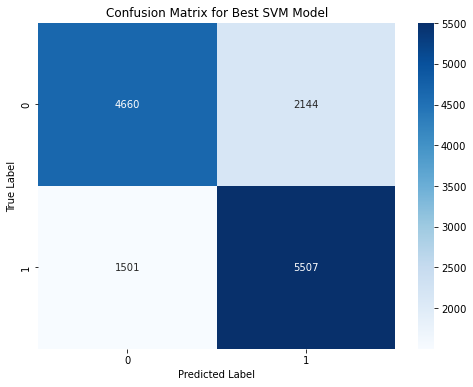

In [72]:
# Plotting the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

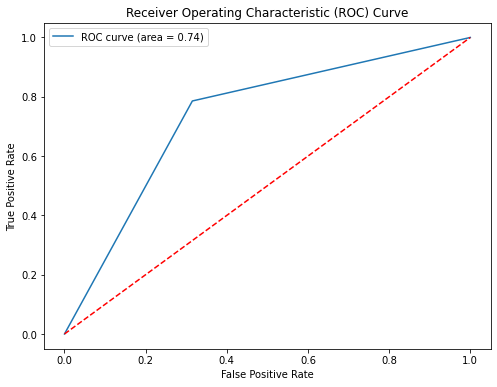

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 4-Using KNN

### 4.1-Finding the Best K value

In [74]:
# Set up k-values for KNN, initialize variables for tracking best accuracy and errors
k_values = np.arange(1, 150, 2)
best_accuracy = 0
prediction_errors = []
test_accuracies = []

# Loop through k-values to find the one with the best accuracy
for k in k_values:
    # Train and predict using KNN model with current k
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_val)

    # Calculate and record errors and accuracy
    errors = sum(y_val != y_predict)
    test_accuracy = accuracy_score(y_val, y_predict)
    prediction_errors.append(errors)
    test_accuracies.append(test_accuracy * 100)

    # Display current k
    print(f"Number of prediction errors for k={k}: {errors}  Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Update best accuracy
    if best_accuracy < test_accuracy:
        best_accuracy = test_accuracy
        best_k = k
        best_error = errors

# Display the best k value
print(f"Best k value with the least prediction errors is at k = {best_k} with accuracy of {best_accuracy* 100:.2f}% with errors of {best_error}")

Number of prediction errors for k=1: 4807  Test Accuracy: 65.19%
Number of prediction errors for k=3: 4280  Test Accuracy: 69.01%
Number of prediction errors for k=5: 4076  Test Accuracy: 70.49%
Number of prediction errors for k=7: 3957  Test Accuracy: 71.35%
Number of prediction errors for k=9: 3931  Test Accuracy: 71.54%
Number of prediction errors for k=11: 3819  Test Accuracy: 72.35%
Number of prediction errors for k=13: 3808  Test Accuracy: 72.43%
Number of prediction errors for k=15: 3802  Test Accuracy: 72.47%
Number of prediction errors for k=17: 3752  Test Accuracy: 72.83%
Number of prediction errors for k=19: 3754  Test Accuracy: 72.82%
Number of prediction errors for k=21: 3724  Test Accuracy: 73.04%
Number of prediction errors for k=23: 3765  Test Accuracy: 72.74%
Number of prediction errors for k=25: 3726  Test Accuracy: 73.02%
Number of prediction errors for k=27: 3747  Test Accuracy: 72.87%
Number of prediction errors for k=29: 3719  Test Accuracy: 73.07%
Number of predi

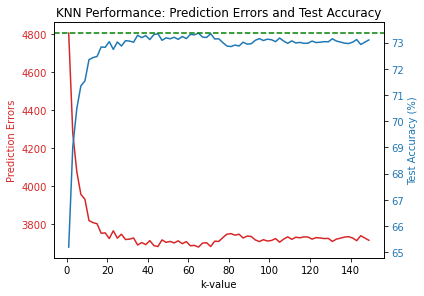

In [75]:
# Visualising The results of each K value
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k-value')
ax1.set_ylabel('Prediction Errors', color=color)
ax1.plot(k_values, prediction_errors, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Test Accuracy (%)', color=color)
ax2.plot(k_values, test_accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.axhline(y=best_accuracy*100, color='g', linestyle='--')
plt.title('KNN Performance: Prediction Errors and Test Accuracy')
plt.show()

### 4.2-Creating the Model and Training it

In [76]:
# Creating a K-Nearest Neighbors classifier with the optimal number of neighbors (best_k)
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Training the model using the training dataset
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=65)

### 4.3-Evaluating the Model

In [77]:
# Comparing validation and testing
print(f"At k = {best_k}")

# Evaluating the model on the validation set
print(f"Validation Accuracy: {100*knn_model.score(X_val, y_val):.2f}%")

# Evaluating the model on the training set
print(f"Training Accuracy: {100*knn_model.score(X_train, y_train):.2f}%")

# Evaluating the model on the testing set
print(f"Testing Accuracy: {100*knn_model.score(X_test, y_test):.2f}%")


At k = 65
Validation Accuracy: 73.36%
Training Accuracy: 73.52%
Testing Accuracy: 72.18%


In [78]:
# Printing the classifcation report
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      6804
         1.0       0.71      0.77      0.74      7008

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



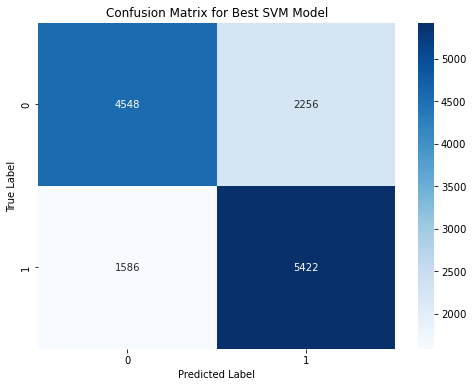

In [79]:
# Plotting the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

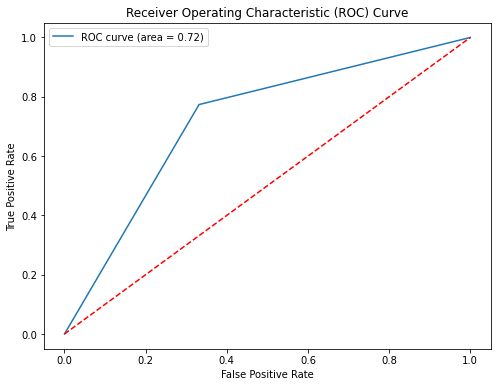

In [80]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 5-Using Logistic Regression

### 5.1-Creating the Model and Training it

In [81]:
# Creating a pipeline that first scales the data then applies logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000))

# Training the model using the training dataset
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=100000))])

### 5.2-Evaluating the Model

In [82]:
# Evaluating the model on the validation set
print(f"Validation Accuracy: {100*model.score(X_val, y_val):.2f}%")

# Evaluating the model on the training set
print(f"Training Accuracy: {100*model.score(X_train, y_train):.2f}%")

# Evaluating the model on the testing set
print(f"Testing Accuracy: {100*model.score(X_test, y_test):.2f}%")


Validation Accuracy: 75.21%
Training Accuracy: 74.50%
Testing Accuracy: 73.68%


In [83]:
# Printing the classifcation report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73      6804
         1.0       0.73      0.76      0.75      7008

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



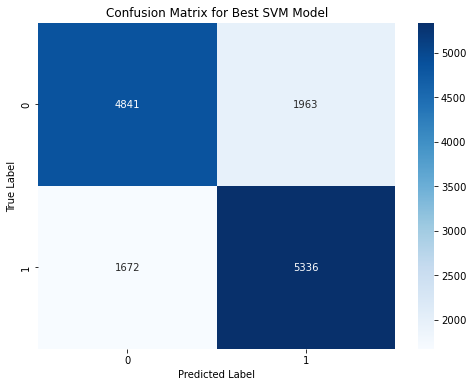

In [84]:
# Plotting the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

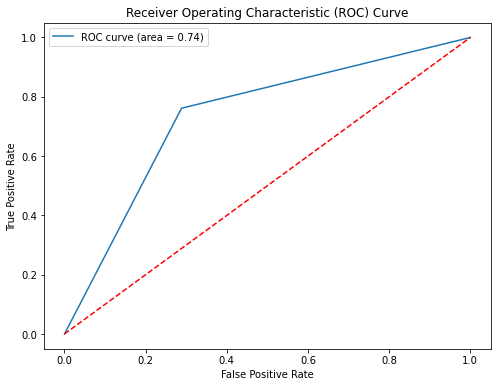

In [85]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 6-Using MLP

### 6.1-Creating and Training the Model

In [86]:
# Creating a multi-layer neural network with one hidden layer of 30 perceptrons
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(30)) 

# Training the model on the training dataset
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=30, max_iter=1000, random_state=1)

### 6.2-Evaluating the Model

In [87]:
# Evaluating the model on the validation set
print(f"Validation Accuracy: {100*mlp.score(X_val, y_val):.2f}%")

# Evaluating the model on the training set
print(f"Training Accuracy: {100*mlp.score(X_train, y_train):.2f}%")

# Evaluating the model on the testing set
print(f"Testing Accuracy: {100*mlp.score(X_test, y_test):.2f}%")

Validation Accuracy: 75.11%
Training Accuracy: 74.82%
Testing Accuracy: 73.95%


In [88]:
# Printing the classifcation report
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      6804
         1.0       0.74      0.75      0.75      7008

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



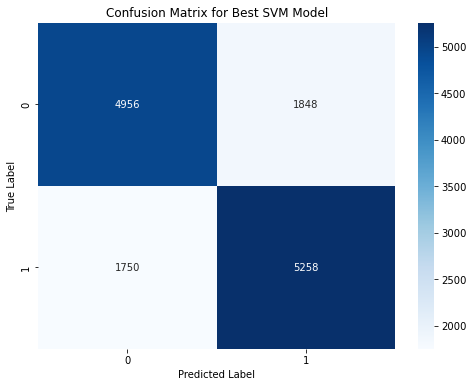

In [89]:
# Plotting the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

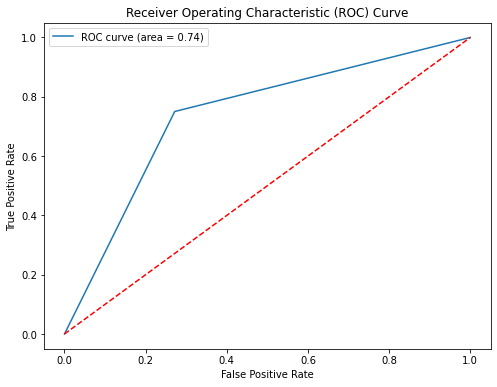

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 7-Using Forest

### 7.1-Creating the Model and Training it

In [91]:
# Creating a pipeline that first scales the data then applies Random Forest
model = make_pipeline(StandardScaler(), RandomForestClassifier())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

### 7.2-Evaluating the Model

In [92]:
# Evaluating the model on the validation set
print(f"Validation Accuracy: {100*model.score(X_val, y_val):.2f}%")

# Evaluating the model on the training set
print(f"Training Accuracy: {100*model.score(X_train, y_train):.2f}%")

# Evaluating the model on the testing set
print(f"Testing Accuracy: {100*model.score(X_test, y_test):.2f}%")

Validation Accuracy: 73.58%
Training Accuracy: 99.63%
Testing Accuracy: 72.60%


In [93]:
# Printing the classifcation report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      6804
         1.0       0.71      0.77      0.74      7008

    accuracy                           0.73     13812
   macro avg       0.73      0.73      0.73     13812
weighted avg       0.73      0.73      0.73     13812



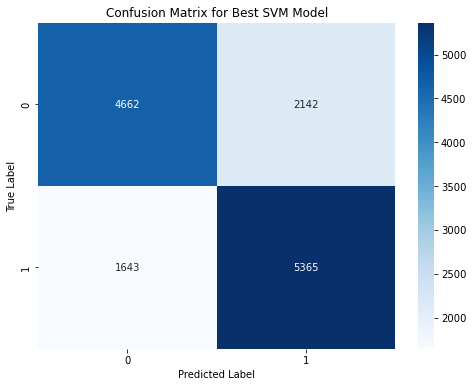

In [94]:
# Plotting the confusion matrix
cm_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best SVM Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

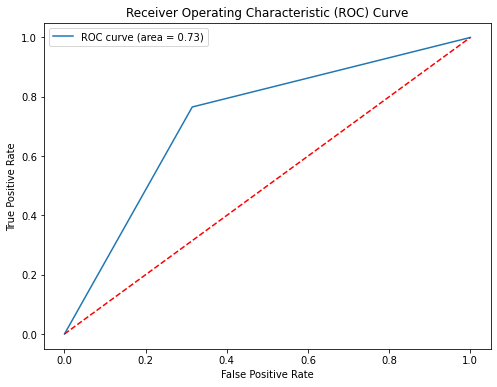

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()